# Voronoi splitter script

Import modules

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from voronoi_splitter import *

## Set input polygon

### **With list of coordinates as input**

In [2]:
coordinates_a = [
    (481084.7511,	9254639.9827),
    (480892.7311,	9253708.5498),
    (480369.7494,	9253843.1087),
    (480536.2017,	9254658.7499),
    (480536.2017,	9254658.7499),
    (480369.7494,	9253843.1087),
    (479840.5872,	9253947.3874),
    (480029.5482,	9254881.0150),
    (480029.5482,	9254881.0150),
    (479840.5872,	9253947.3874),
    (479306.6472,	9254046.4516),
    (479483.9255,	9254896.9338),
    (479483.9255,	9254896.9338),
    (479306.6427,	9254046.4516),
    (478788.1783,	9254184.9157),
    (478964.7967,	9255065.1213),
    (478964.7967,	9255065.1213),
    (478788.1783,	9254184.9157),
    (478264.2269,	9254314.7229),
    (478431.6493,	9255135.1176),
    (478431.6493,	9255135.1176),
    (478264.2269,	9254314.7229),
    (477730.2743,	9254424.8583),
    (477905.5111,	9255254.2095)
]

coordinates_b = [
    (480354.5654, 9253821.1975),
    (480879.5466, 9253686.3376),
    (480709.9375, 9252855.2276),
    (480183.7994, 9252974.3195),
    (479827.2704, 9253924.5214),
    (480354.5654, 9253821.1975),
    (480183.7994, 9252974.3195),
    (479645.2393, 9253030.4658),
    (479827.2704, 9253924.5214),
    (479645.2393, 9253030.4658),
    (479131.5232, 9253212.5033),
    (479301.1323, 9254022.0480),
    (479301.1323, 9254022.0480),
    (479131.5232, 9253212.5033),
    (478605.3851, 9253282.4052),
    (478774.9942, 9254162.7052),
    (478774.9942, 9254162.7052),
    (478605.3851, 9253282.4052),
    (478069.6271, 9253414.2081),
    (478250.5672, 9254292.3471),
    (477722.7179, 9254400.8891),
    (478250.5672, 9254292.3471),
    (478069.6271, 9253414.2081),
    (477552.0354, 9253552.2003),
    (477643.5880, 9254021.8984)
]

polygon_number_db = 1

<AxesSubplot:>

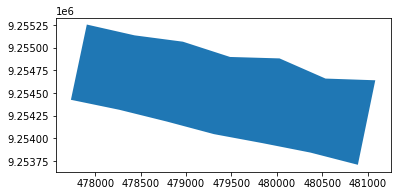

In [4]:
poly_a = polygon_from_coord(coordinates_a, mode='concave')
poly_a = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly_a, crs=32718))

poly_a_leaflet = poly_a.to_crs(4326)
poly_a_leaflet.to_file('leaflet/pol_a.geojson', driver='GeoJSON')

poly_a['pol_id'] = polygon_number_db
poly_a.plot()

<AxesSubplot:>

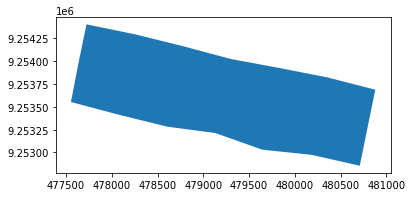

In [5]:
poly_b = polygon_from_coord(coordinates_b, mode='concave')
poly_b = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly_b, crs=32718))

poly_b_leaflet = poly_b.to_crs(4326)
poly_b_leaflet.to_file('leaflet/pol_b.geojson', driver='GeoJSON')

poly_b['pol_id'] = polygon_number_db
poly_b.plot()

## Applies "voronoi_splitter" function and retrieves the result in an object called "result"

The arguments of the function voronoi_splitter are:
- Input polygon as a geopandas object
- Number of sub-polygons for the output (the number of smaller polygons requested as an output)
- CRS (coordinate reference system) of the input
- Number of random points used to build the Voronoi's polygons, the bigger the number the less variance in the areas of the resulting polygons (but also a big number of point can make the function slow, and eventually break the procces)
- The seed is just for make reproductible the random point generation, does't matter in this case and is set by default to 1

### Polygon A (north)

In [6]:
# define mean wanted area for the subpolygons
subpoly_area = 4500

print('Polygon area: {} sq. mt'.format(round(poly_a.area.values[0])))

n_subpolygons = round(poly_a.area.values[0]/subpoly_area)
n_subpolygons

Polygon area: 2855327 sq. mt


635

In [7]:
# adds NFTs ID
result_a = voronoi_splitter(poly_a, 635, crs='EPSG:32718', npoints=12000, seed=1, offset_id=0)
result_a['nft_id'] = nft_id(result_a, 'pol_id', 'subpol_id')

# adds image path
ndt_images_path = nft_images(result_a, 'subpol_id')
result_a['gridview_img'] = ndt_images_path[0]
result_a['zoomview_img'] = ndt_images_path[1]

result_a.head(2)

A total of 635 polygons where created.
Areas range from 1348 to 7168 square meters
The mean area is 4497 square meters


pol_id                                           geometry  subpol_id  \
0       1  POLYGON ((-75.20104 -6.74467, -75.20070 -6.744...          1   
1       1  POLYGON ((-75.20113 -6.74382, -75.20085 -6.744...          2   

     area  centroid_x  centroid_y     nft_id  \
0  4360.8  -75.201052   -6.744977  #001-0001   
1  4279.0  -75.201160   -6.744311  #001-0002   

                        gridview_img                       zoomview_img  
0  /_img/gridview/gridview_img_1.jpg  /_img/zoomview/zoomview_img_1.jpg  
1  /_img/gridview/gridview_img_2.jpg  /_img/zoomview/zoomview_img_2.jpg

<AxesSubplot:>

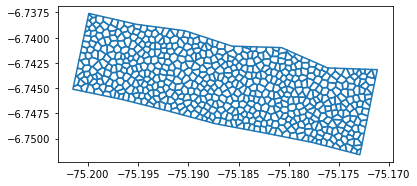

In [8]:
result_a.boundary.plot()

In [9]:
#GeoJSON
# result_a.to_file('output_data/voronois_pol_a_disperse.geojson', driver='GeoJSON')

(array([ 1.,  0.,  0.,  2.,  2.,  8.,  2.,  5.,  7., 23., 30., 25., 51.,
        42., 55., 56., 58., 53., 43., 33., 40., 34., 21., 18., 12.,  6.,
         2.,  1.,  2.,  3.]),
 array([1348.2       , 1542.18333333, 1736.16666667, 1930.15      ,
        2124.13333333, 2318.11666667, 2512.1       , 2706.08333333,
        2900.06666667, 3094.05      , 3288.03333333, 3482.01666667,
        3676.        , 3869.98333333, 4063.96666667, 4257.95      ,
        4451.93333333, 4645.91666667, 4839.9       , 5033.88333333,
        5227.86666667, 5421.85      , 5615.83333333, 5809.81666667,
        6003.8       , 6197.78333333, 6391.76666667, 6585.75      ,
        6779.73333333, 6973.71666667, 7167.7       ]),
 <BarContainer object of 30 artists>)

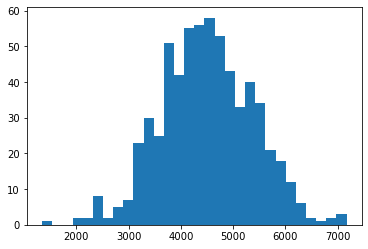

In [10]:
area = result_a['area']
fig, axs = plt.subplots(1)
plt.savefig('descriptive/histA_2.jpg')
axs.hist(area, bins=30)

In [11]:
print(area.describe())
print('Min. area value in US$: ', min(area) * 0.25)

count     635.000000
mean     4496.578425
std       881.920019
min      1348.200000
25%      3891.500000
50%      4480.500000
75%      5084.650000
max      7167.700000
Name: area, dtype: float64
Min. area value in US$:  337.05


### Polygon B (south)

In [12]:
# define mean wanted area for the subpolygons
subpoly_area = 10000

print('Polygon area: {} sq. mt'.format(round(poly_b.area.values[0])))

n_subpolygons = round(poly_b.area.values[0]/subpoly_area)
n_subpolygons

Polygon area: 2833575 sq. mt


283

In [13]:
# adds NFTs ID
result_b = voronoi_splitter(poly_b, 238, crs='EPSG:32718', npoints=90000, seed=1, offset_id=635)
result_b['nft_id'] = nft_id(result_b, 'pol_id', 'subpol_id')

# adds image path
ndt_images_path = nft_images(result_b, 'subpol_id')
result_b['gridview_img'] = ndt_images_path[0]
result_b['zoomview_img'] = ndt_images_path[1]

result_b.head(3)

A total of 238 polygons where created.
Areas range from 9614 to 14811 square meters
The mean area is 11906 square meters


pol_id                                           geometry  subpol_id  \
0       1  POLYGON ((-75.17370 -6.75274, -75.17410 -6.752...        636   
1       1  POLYGON ((-75.17424 -6.75366, -75.17430 -6.753...        637   
2       1  POLYGON ((-75.20065 -6.74640, -75.20082 -6.746...        638   

      area  centroid_x  centroid_y     nft_id  \
0  11320.7  -75.173554   -6.752173  #001-0636   
1  10256.4  -75.173727   -6.753340  #001-0637   
2  12423.6  -75.201112   -6.745877  #001-0638   

                          gridview_img                         zoomview_img  
0  /_img/gridview/gridview_img_636.jpg  /_img/zoomview/zoomview_img_636.jpg  
1  /_img/gridview/gridview_img_637.jpg  /_img/zoomview/zoomview_img_637.jpg  
2  /_img/gridview/gridview_img_638.jpg  /_img/zoomview/zoomview_img_638.jpg

<AxesSubplot:>

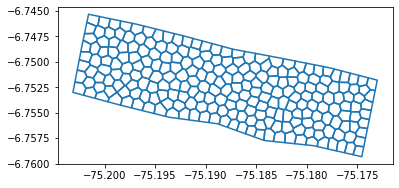

In [14]:
result_b.boundary.plot()

In [15]:
#GeoJSON
# result_b.to_file('output_data/voronois_pol_b_disperse.geojson', driver='GeoJSON')

(array([ 3.,  2.,  0.,  8.,  7.,  7., 10.,  7., 18., 12., 14., 14., 13.,
        20., 11., 14., 16., 10., 12., 10.,  7.,  4.,  7.,  3.,  3.,  2.,
         1.,  1.,  1.,  1.]),
 array([ 9613.6 ,  9786.84,  9960.08, 10133.32, 10306.56, 10479.8 ,
        10653.04, 10826.28, 10999.52, 11172.76, 11346.  , 11519.24,
        11692.48, 11865.72, 12038.96, 12212.2 , 12385.44, 12558.68,
        12731.92, 12905.16, 13078.4 , 13251.64, 13424.88, 13598.12,
        13771.36, 13944.6 , 14117.84, 14291.08, 14464.32, 14637.56,
        14810.8 ]),
 <BarContainer object of 30 artists>)

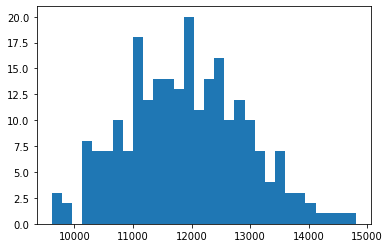

In [16]:
area = result_b['area']
fig, axs = plt.subplots(1)
plt.savefig('descriptive/histB_2.jpg')
axs.hist(area, bins=30)

In [17]:
print(area.describe())
print('Min. area value in US$: ', min(area) * 0.25)

count      238.000000
mean     11905.776891
std       1012.939405
min       9613.600000
25%      11145.450000
50%      11900.600000
75%      12589.100000
max      14810.800000
Name: area, dtype: float64
Min. area value in US$:  2403.4


### Data merge & save

In [18]:
polygons = gpd.GeoDataFrame(pd.concat([result_a, result_b], ignore_index=True))

In [29]:
polygons.to_file('output_data/001_nft_disperse.geojson', driver='GeoJSON')

In [30]:
polygons_utm = polygons.to_crs(32718)
polygons_utm.to_file('output_data/001_nft_utm_disperse.geojson', driver='GeoJSON')

In [31]:
result_columns =  ['nft_id', 'pol_id', 'subpol_id', 'area', 'coordinates', 'centroid']
json_writer('output_data/001_nft_disperse.json', polygons, result_columns)

JSON file was writen in output_data/001_nft_disperse.json


In [32]:
polygons.to_excel('output_data/001_nft_data.xlsx', index=False)